# 1. Import and Install Dependencies

In [11]:
#import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
#import mediapipe as mp

In [1]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical # type: ignore

In [13]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data') 

# Actions that we try to detect
actions = np.array(['hello', 'namaste', 'bye', 'india', 'thanks', 'sorry', 'good', 'yes', 'no', '_'])

# Thirty videos worth of data
no_sequences = 50

# Videos are going to be 30 frames in length
sequence_length = 30

In [14]:
# Dictionary of all labels
label_map = {label:num for num, label in enumerate(actions)}

In [15]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [16]:
X = np.array(sequences)

In [17]:
y = to_categorical(labels).astype(int)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=42)

In [19]:
X_train.shape

(475, 30, 1662)

In [2]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import LSTM, Dense # type: ignore
from tensorflow.keras.callbacks import TensorBoard # type: ignore

In [17]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [24]:
model = Sequential()
#64,128,64,64,32
model.add(LSTM(128, return_sequences=True, activation='relu', input_shape=(30,1662))) # 30 frames, 1662 keypoints
model.add(LSTM(256, return_sequences=True, activation='relu'))
model.add(LSTM(128, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

c:\miniconda3\envs\DTI\lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [20]:
model.fit(X_train, y_train, epochs=80, callbacks=[tb_callback])

Epoch 1/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 6s 173ms/step - categorical_accuracy: 0.1133 - loss: 2.7010
Epoch 2/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 168ms/step - categorical_accuracy: 0.1303 - loss: 2.4748
Epoch 3/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 165ms/step - categorical_accuracy: 0.3512 - loss: 1.8587
Epoch 4/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - categorical_accuracy: 0.3622 - loss: 1.6012
Epoch 5/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 179ms/step - categorical_accuracy: 0.3899 - loss: 1.5063
Epoch 6/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 182ms/step - categorical_accuracy: 0.4639 - loss: 1.2952
Epoch 7/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 176ms/step - categorical_accuracy: 0.4526 - loss: 1.3426
Epoch 8/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - categorical_accuracy: 0.4851 - loss: 1.1730
Epoch 9/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 186ms/step - categorical_accuracy: 0.5520 - loss: 1.0333
Epoch 10/80
15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 174ms/step - categorical_accuracy: 0.5738 - loss: 0.9260
Epoch 11/80
15/15 ━

In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 128)        │       916,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 256)        │       394,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 128)            │       197,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,557,056 (17.38 MB)

 Trainable params: 1,519,018 (5.79 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 3,038,038 (11.59 MB)

# Save Weights

In [22]:
model.save('model.h5')

In [26]:
model.load_weights('model.h5')

# 10. Evaluation using Confusion Matrix and Accuracy

In [21]:
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
yhat = model.predict(X_train)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step


In [28]:
ytrue = np.argmax(y_train, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

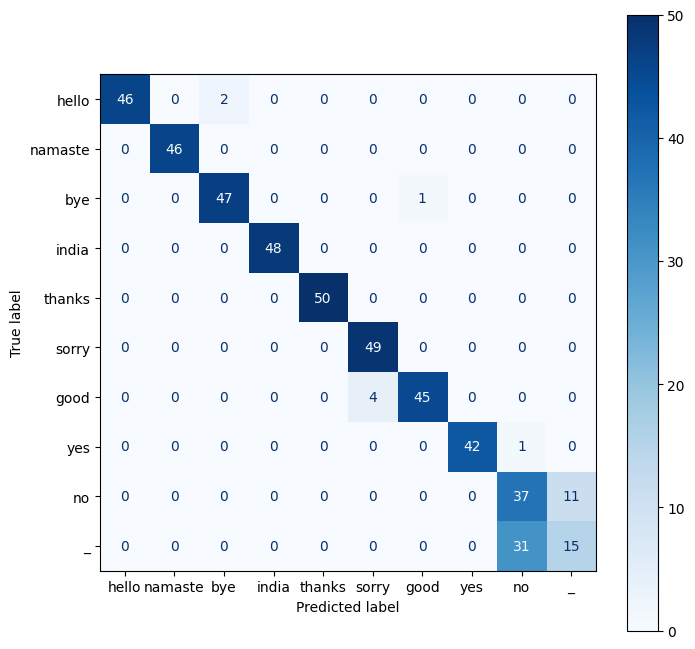

In [43]:
fig, ax = plt.subplots(figsize=(8, 8))
ConfusionMatrixDisplay.from_predictions(ytrue, yhat, display_labels=actions, cmap=plt.cm.Blues, ax = ax)